# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read mean MKE and EKE from AVISO and BRAN

In [2]:
dataset0    = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_mean.mat')
aviso_lon   = dataset0['aviso_lon'][:,:]+180
aviso_lat   = dataset0['aviso_lat'][:,:]
bran_lon    = dataset0['bran_lon'][:,:]
bran_lat    = dataset0['bran_lat'][:,:]
bran_eke    = dataset0['bran_EKE_mean'][:,:]
eke_mean    = dataset0['aviso_eke_mean'][:,:]
aviso_eke   = np.concatenate((eke_mean[720:,:],eke_mean[:720,:]),axis=0)
# Read BRAN mke
dataset1    = xr.open_dataset(directory+'/BRAN_WBC/SO/BRAN/BRAN2020_WBC_clim_uvw.nc')
bran_u      = dataset1.clim_u[0,:,:].transpose().values
bran_v      = dataset1.clim_v[0,:,:].transpose().values
bran_mke    = 0.5 * np.sqrt(bran_u * bran_u  + bran_v * bran_v)
# Read AVISO mke
dataset2    = xr.open_dataset(directory+'/BRAN_WBC/SO/AVISO/AVISO_monthly_SSH_LS_detrend.nc')
dataset3    = xr.open_dataset(directory+'/BRAN_WBC/SO/AVISO/AVISO_eddy_WBC_ugos.nc')
dataset4    = xr.open_dataset(directory+'/BRAN_WBC/SO/AVISO/AVISO_eddy_WBC_vgos.nc')
aviso_ssh0  = dataset2.adt.mean(axis=0).transpose().values
aviso_ugos0 = dataset3.ugos.mean(axis=0).transpose().values
aviso_vgos0 = dataset4.vgos.mean(axis=0).transpose().values
aviso_mke0  = 0.5 * np.sqrt(aviso_ugos0 * aviso_ugos0 + aviso_vgos0 * aviso_vgos0)
aviso_ssh   = np.concatenate((aviso_ssh0[720:,:],aviso_ssh0[:720,:]),axis=0)
aviso_ugos  = np.concatenate((aviso_ugos0[720:,:],aviso_ugos0[:720,:]),axis=0)
aviso_vgos  = np.concatenate((aviso_vgos0[720:,:],aviso_vgos0[:720,:]),axis=0)
aviso_mke   = np.concatenate((aviso_mke0[720:,:],aviso_mke0[:720,:]),axis=0)

# Plot the spatial distribution of MKE and surface EKE

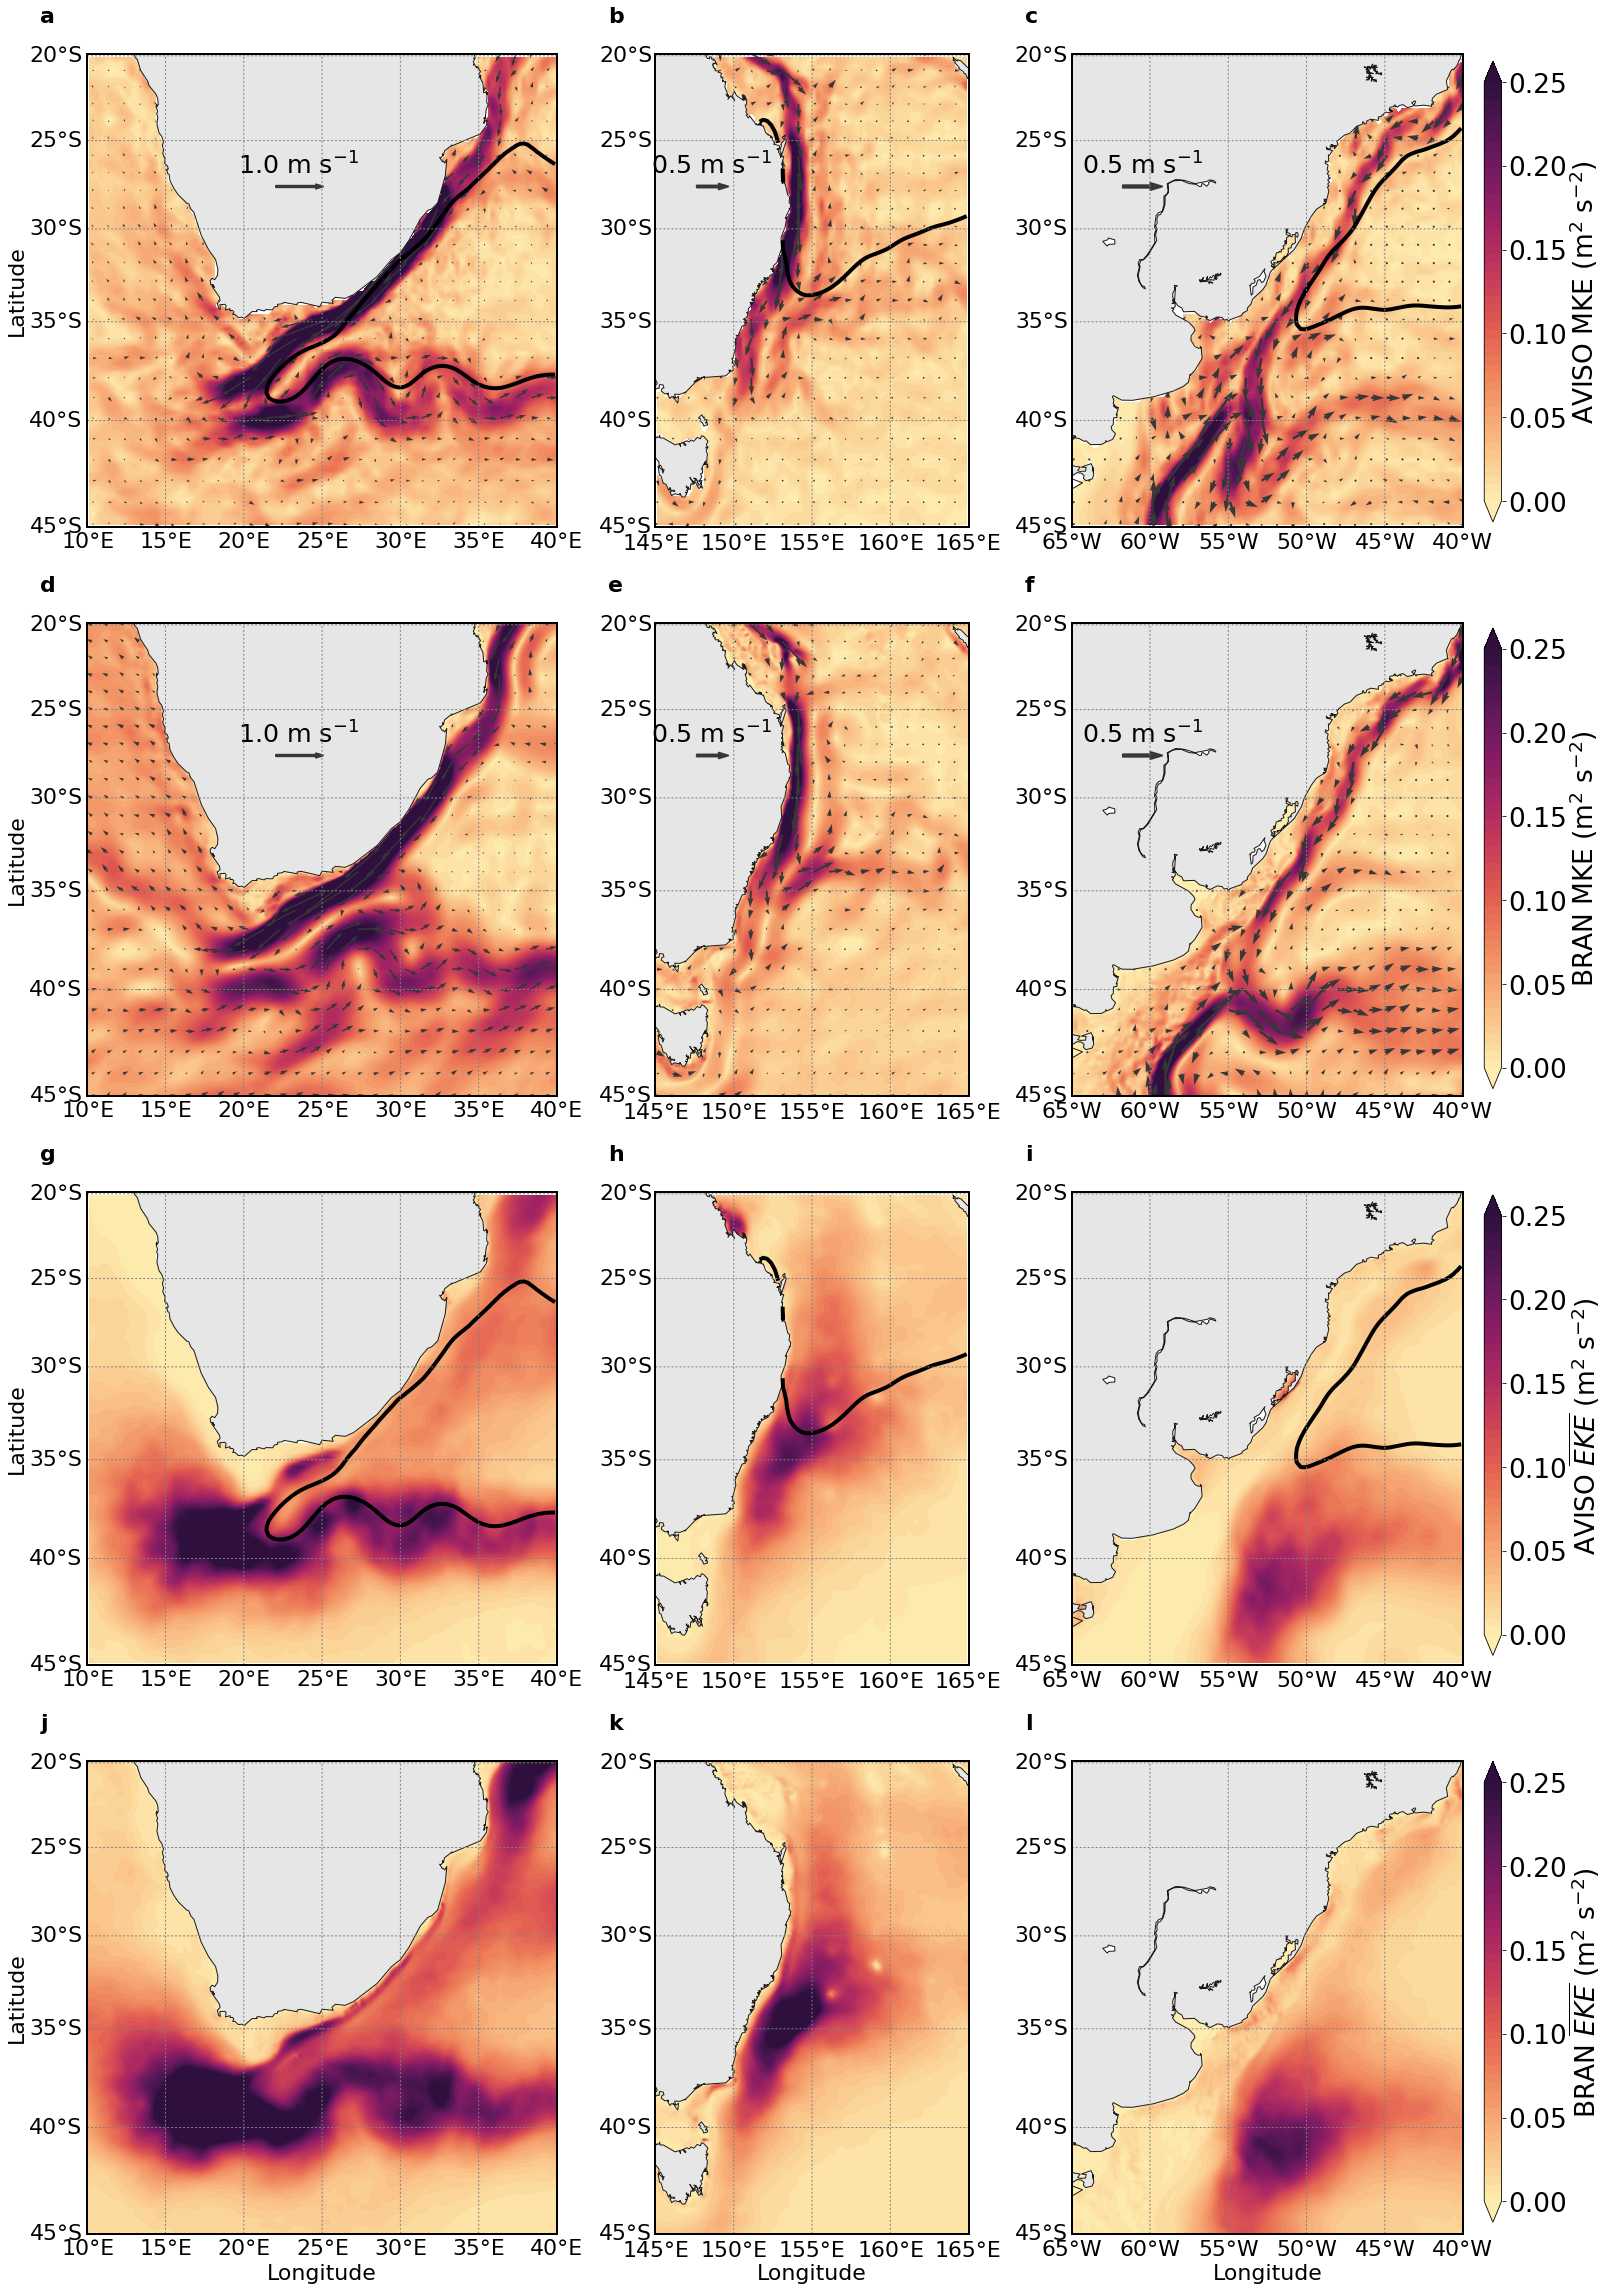

In [3]:
##############################################################################################################
labels        = ['a','b','c','d','e','f','g','h','i','j','k','l']
levels1       = np.linspace(0,0.25,50)
tick_marks1   = np.linspace(0,0.25,6)
cmaps1        = cmaps1        = cmaps.cmocean_matter
fig_ratio     = 0.9
fig           = plt.figure(figsize=(24, 32))
gs            = gridspec.GridSpec(4,3)
labelfont     = 22
padspacescale = 10
labelpadscale = 2
linefont      = 1
scale         = 1.25
##############################################################################################################
for i in range(12):
    if i==0:
        lon       = aviso_lon[0:202,60:204]      
        lat       = aviso_lat[0:202,60:204]      
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = aviso_mke[0:202,60:204]        
        var_u     = aviso_ugos[0:202,60:204]      
        var_v     = aviso_vgos[0:202,60:204]      
    elif i==1:
        lon       = aviso_lon[579:663,60:164]      
        lat       = aviso_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]  
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = aviso_mke[579:663,60:164]      
        var_u     = aviso_ugos[579:663,60:164]       
        var_v     = aviso_vgos[579:663,60:164]   
    elif i==2:
        lon       = aviso_lon[1179:1283,40:164]      
        lat       = aviso_lat[1179:1283,40:164]    
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_mean  = aviso_mke[1179:1283,40:164]           
        var_u     = aviso_ugos[1179:1283,40:164]            
        var_v     = aviso_vgos[1179:1283,40:164]           
    elif i==3:
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]   
        var_mean  = bran_mke[1:500,150:505]
        var_u     = bran_u[1:500,150:505]
        var_v     = bran_v[1:500,150:505]
    elif i==4:  
        lon       = bran_lon[1449:1650,150:405]      
        lat       = bran_lat[1449:1650,150:405]      
        var_mean  = bran_mke[1449:1650,150:405]      
        var_u     = bran_u[1449:1650,150:405]      
        var_v     = bran_v[1449:1650,150:405]      
    elif i==5:
        lon       = bran_lon[2948:3200,100:405]           
        lat       = bran_lat[2948:3200,100:405]      
        var_mean  = bran_mke[2948:3200,100:405]          
        var_u     = bran_u[2948:3200,100:405]          
        var_v     = bran_v[2948:3200,100:405]          
    elif i==6:
        lon       = aviso_lon[0:202,60:204]           
        lat       = aviso_lat[0:202,60:204]       
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)   
        var_mean  = aviso_eke[0:202,60:204] 
    elif i==7:
        lon       = aviso_lon[579:663,60:164]      
        lat       = aviso_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]   
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = aviso_eke[579:663,60:164] 
    elif i==8:
        lon       = aviso_lon[1179:1283,40:164]      
        lat       = aviso_lat[1179:1283,40:164]     
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_mean  = aviso_eke[1179:1283,40:164]        
    elif i==9:
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]   
        var_mean  = bran_eke[1:500,150:505]   
    elif i==10:
        lon       = bran_lon[1449:1650,150:405]           
        lat       = bran_lat[1449:1650,150:405]       
        var_mean  = bran_eke[1449:1650,150:405]          
    else:
        lon       = bran_lon[2948:3200,100:405]          
        lat       = bran_lat[2948:3200,100:405]       
        var_mean  = bran_eke[2948:3200,100:405]     
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    if np.mod(i,3)==0:     
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')    
        plt.ylabel('Latitude',fontsize=labelfont,labelpad=6*padspacescale,family='sans-serif')
        cx,cy = m(7, -18.0)
    elif np.mod(i,3)==1:
        m      = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=145,urcrnrlon=165,resolution='l')    
        cx, cy  = m(142, -18.0)
        l=l+0.01
    else:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=295,urcrnrlon=320,resolution='l')    
        cx, cy  = m(292, -18.0)
        
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white')
    x, y = m(lon, lat)
    if i<3:
        yy = np.arange(1, y.shape[0], 4)
        xx = np.arange(1, x.shape[1], 4)
    else:
        yy = np.arange(1, y.shape[0], 10)
        xx = np.arange(1, x.shape[1], 10)
    points      = np.meshgrid(yy, xx)

    if i<3:
        b=b+0.0
        CB1=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    elif i<6:
        b=b-0.05
        CB2=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
    elif i<9:
        b=b-0.1
        CB3=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    else:
        b=b-0.15
        CB4=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        plt.xlabel('Longitude',fontsize=labelfont,labelpad=3*padspacescale,family='sans-serif')
        
    if i<6:
        if np.mod(i,3)==0:
            Q = m.quiver(x[tuple(points)],y[tuple(points)],var_u[tuple(points)],var_v[tuple(points)],\
                        color='xkcd:dark grey',width=0.003,scale=10.0)
            qk = plt.quiverkey(Q, 0.45, 0.72, 1.0, r'1.0 m s$^{-1}$',labelpos='N',color='xkcd:dark grey',linewidth=linefont*2.0,fontproperties={'size': 1.15*labelfont})
        elif np.mod(i,3)==1:
            Q = m.quiver(x[tuple(points)],y[tuple(points)],var_u[tuple(points)],var_v[tuple(points)],\
                        color='xkcd:dark grey',width=0.006,scale=5.0)
            qk = plt.quiverkey(Q, 0.18, 0.72, 0.5, r'0.5 m s$^{-1}$',labelpos='N',color='xkcd:dark grey',linewidth=linefont*2.0,fontproperties={'size': 1.15*labelfont})
        else: 
            Q = m.quiver(x[tuple(points)],y[tuple(points)],var_u[tuple(points)],var_v[tuple(points)],\
                        color='xkcd:dark grey',width=0.006,scale=5.0)
            qk = plt.quiverkey(Q, 0.18, 0.72, 0.5, r'0.5 m s$^{-1}$',labelpos='N',color='xkcd:dark grey',linewidth=linefont*2.0,fontproperties={'size': 1.15*labelfont})
    
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',\
                length=25,width=2,colors='black',direction='out')
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
    ax.set_position([l, b, scale*w, scale*h])  
    if np.mod(i,3)==0:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h])   
    elif np.mod(i,3)==1:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h])   
    else:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h]) 
cbaxes1     = fig.add_axes([0.94, 0.718, 0.01, 0.2])
cb1 = plt.colorbar(CB1,orientation='vertical',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=1.2*labelfont)
cb1.set_label(r'AVISO MKE (m$^{2}$ s$^{-2}$)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes2     = fig.add_axes([0.94, 0.472, 0.01, 0.2])
cb2 = plt.colorbar(CB2,orientation='vertical',cax = cbaxes2)
cb2.set_ticks(tick_marks1)
cb2.ax.tick_params(labelsize=1.2*labelfont)
cb2.set_label(r'BRAN MKE (m$^{2}$ s$^{-2}$)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes3     = fig.add_axes([0.94, 0.226, 0.01, 0.2])
cb3 = plt.colorbar(CB3,orientation='vertical',cax = cbaxes3)
cb3.set_ticks(tick_marks1)
cb3.ax.tick_params(labelsize=1.2*labelfont)
cb3.set_label(r'AVISO $\overline{EKE}$ (m$^{2}$ s$^{-2}$)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes4     = fig.add_axes([0.94, -0.02, 0.01, 0.2])
cb4 = plt.colorbar(CB4,orientation='vertical',cax = cbaxes4)
cb4.set_ticks(tick_marks1)
cb4.ax.tick_params(labelsize=1.2*labelfont)
cb4.set_label(r'BRAN $\overline{EKE}$ (m$^{2}$ s$^{-2}$)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
fig.savefig(directory+'/BRAN_WBC/SO/FigureS1_mke_eke.pdf',dpi=300,bbox_inches = 'tight')